# Student Performance Indicator
---
## 1. Problem Statement
- This project helps to understand how the key factors like gender, race/ethnicity, parent level educations, lunch and test preparation course are affecting the performance of the students.
## 2. Data Collection
- Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
### 2.1 Importing Data and Required Packages
- numpy 
- pandas
- scikit learn
- matplotlib
- seaborn
- warning etc..

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the CSV Data as pandas Dataframe

In [77]:
df=pd.read_csv('C:/Users/Tnluser/Desktop/MachineLearningProjects/Student_Performance_Analysis/notebook/stud.csv')

#### Show Top 5 Records 

In [78]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [79]:
df.shape

(1000, 8)

#### Features in Dataset

In [80]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#### Features Information
- gender : sex of students (Male/female)

- race/ethnicity : ethnicity of students(Group A, B,C, D,E)
- parental level of education : parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Datacheck to Perform
- Missing Values
- Duplicates
- Datatype
- Number of Unique Values in Each Columns
- Statistics of Dataset
- Check Various Categories Present in the Different Categorical Column


#### 3.1. Check Missing Values


In [81]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no Missing Values in Dataset

#### 3.2. Check Duplicates 

In [82]:
df.duplicated().sum()

0

##### There is No Duplicate Values in Dataset

#### 3.3 Check the Datatype

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4. Check Statistics of Dataset

In [84]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights from the above Data Description
- All means are very close to each other, that is 66 to 69.1
- All standard are very close to each other, that is 57 to 59
- The minimum score in math,reading and writting is 0,17 and 10 resp. 

#### 3.5. Checking the Number of unique Values in Each Columns
 

In [85]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.6. Exploring Data

In [86]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [87]:
# Separating Numeric and Categorical features
numeric_features=[column for column in df.describe().columns]
categorical_features=[column for column in df.describe(exclude= np.number).columns]

print(f"There are {len(numeric_features)} Numeric features are : {numeric_features}")
print(f"There are {len(categorical_features)} Categorical features are : {categorical_features}")

There are 3 Numeric features are : ['math_score', 'reading_score', 'writing_score']
There are 5 Categorical features are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [88]:
#catergories in categorical column
for column in categorical_features:
    print(f"categories in {column} column are : {df[column].unique()} ")

categories in gender column are : ['female' 'male'] 
categories in race_ethnicity column are : ['group B' 'group C' 'group A' 'group D' 'group E'] 
categories in parental_level_of_education column are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
categories in lunch column are : ['standard' 'free/reduced'] 
categories in test_preparation_course column are : ['none' 'completed'] 


### 3.7. Adding Total Score and Average Column in a Copy of CSV

In [89]:
df_copy=df.copy(deep=True)
df_copy['total score']=df_copy['math_score']+df_copy['reading_score']+df_copy['writing_score']
df_copy['average']=round(df_copy['total score']/3,2)

df_copy.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [90]:
math_full_marks=df_copy[df_copy['math_score']==100]['average'].count()
print(f"number of students who got full marks in math : {math_full_marks}")
reading_full_marks=df_copy[df_copy['reading_score']==100]['average'].count()
print(f"Number of students who got full marks in reading : {reading_full_marks}")
writing_full_marks=df_copy[df_copy['writing_score']==100]['average'].count()
print(f"Number of students who got full marks in writing : {writing_full_marks}")

number of students who got full marks in math : 7
Number of students who got full marks in reading : 17
Number of students who got full marks in writing : 14


In [91]:
# Student counts having marks less than 33
cutoff_marks=33
maths_less_marks=df_copy[df_copy['math_score']<=cutoff_marks]['average'].count()
print(f"Number of students who got less or equal to {cutoff_marks} marks in math : {maths_less_marks}")
reading_less_marks=df_copy[df_copy['reading_score']<=cutoff_marks]['average'].count()
print(f"Number of students who got less or equal to {cutoff_marks}  marks in reading : {reading_less_marks}")
writing_less_marks=df_copy[df_copy['writing_score']<=cutoff_marks]['average'].count()
print(f"Number of students who got less or equal to {cutoff_marks}  marks in writing : {writing_less_marks}")

Number of students who got less or equal to 33 marks in math : 20
Number of students who got less or equal to 33  marks in reading : 11
Number of students who got less or equal to 33  marks in writing : 14


#### Insights
- From above observations, we can say that students have performed worst in maths.
- The best performance of the students are in reading.

## 4. Data Exploration and Visualization
### 4.1 Visualization of Average Score Distribution
- Histogram
- Kernel Distribution function (KDE)
  
#### 4.1.1 Histogram and KDE

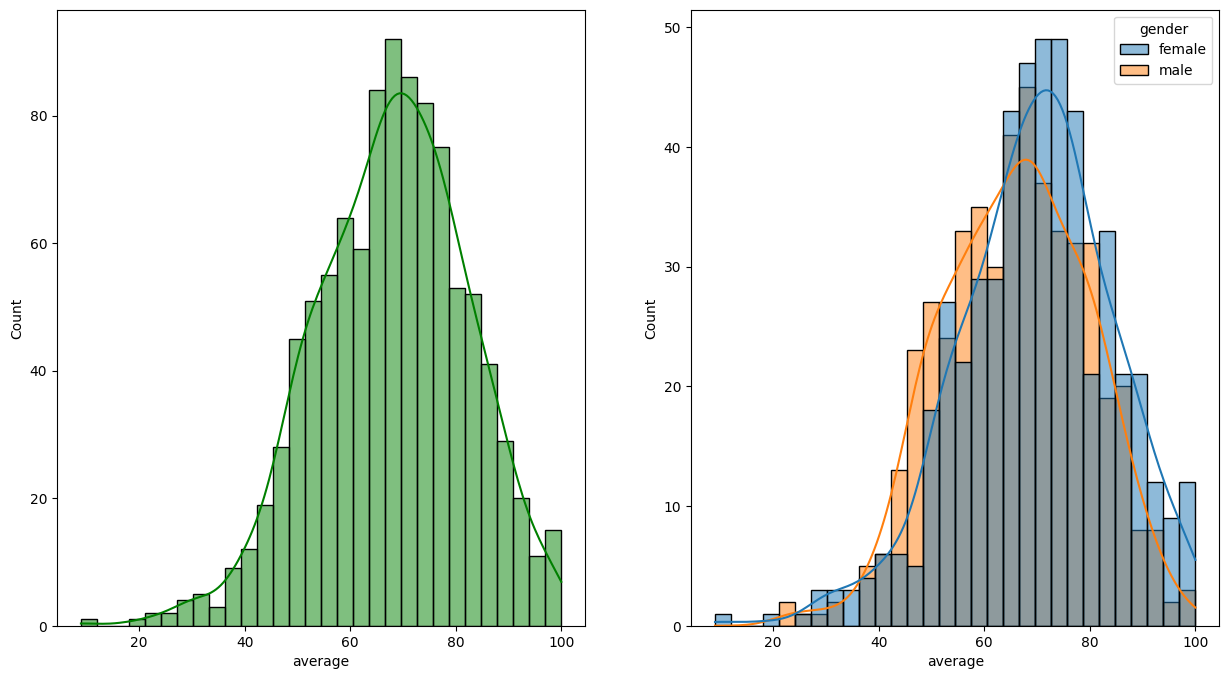

In [92]:
fig, axs=plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)
sns.histplot(data=df_copy,x='average', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_copy,x='average', bins=30,kde=True,hue='gender')
plt.show()

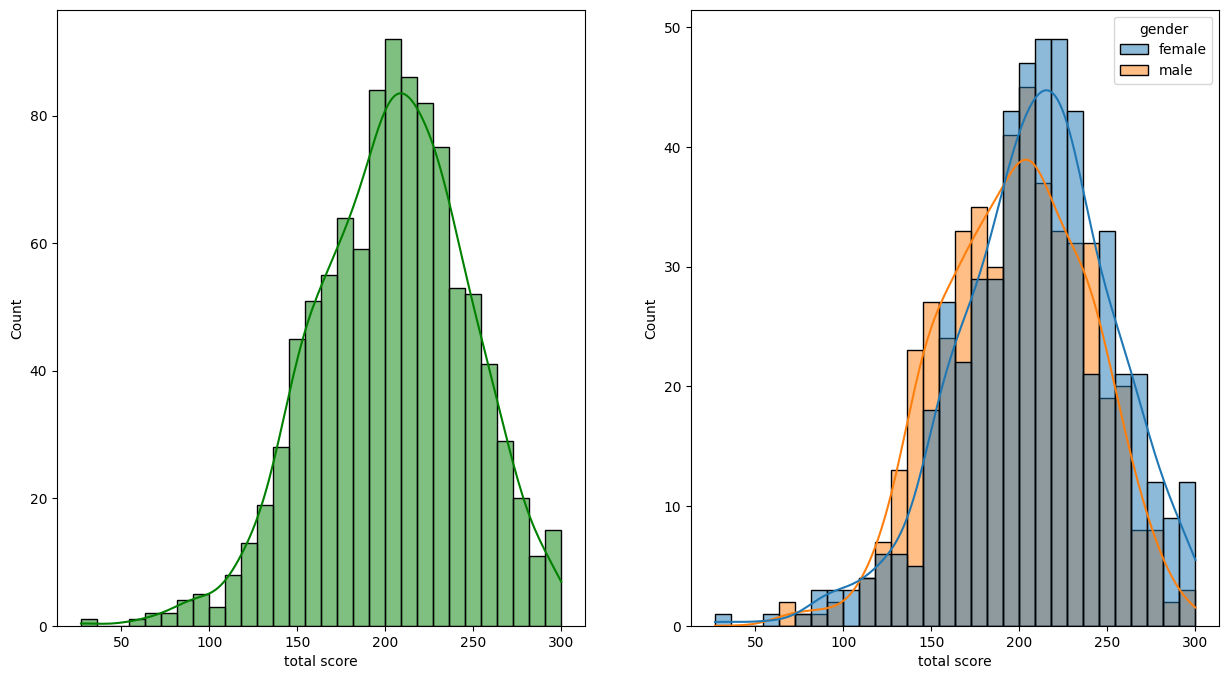

In [93]:
fig, axs=plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)
sns.histplot(data=df_copy,x='total score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_copy,x='total score', bins=30,kde=True,hue='gender')
plt.show()

### Insights
- Performance of femal students is better than male students.

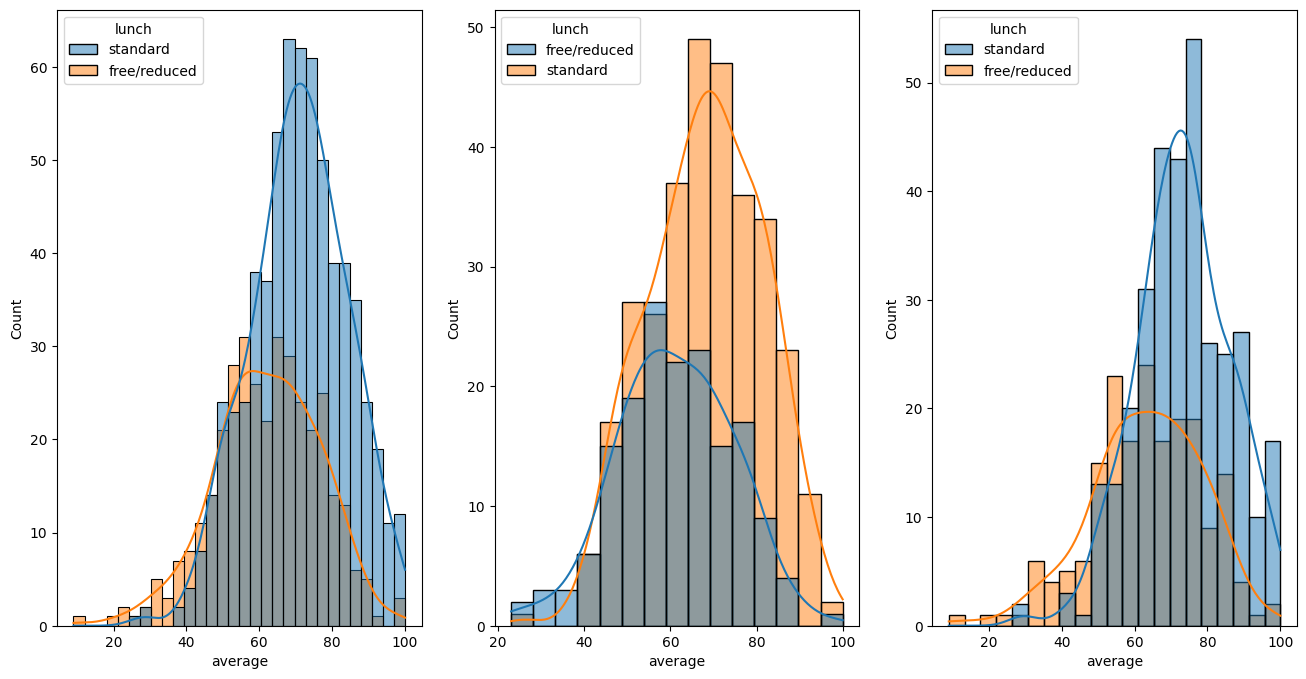

In [94]:
fig,gca = plt.subplots(1,3,figsize=(16,8))
plt.subplot(131)
sns.histplot(data=df_copy,x='average',kde=True,bins=30,hue='lunch')
plt.subplot(132)
sns.histplot(data=df_copy[df_copy['gender']=='male'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df_copy[df_copy['gender']=='female'],x='average',kde=True,hue='lunch')
plt.show()

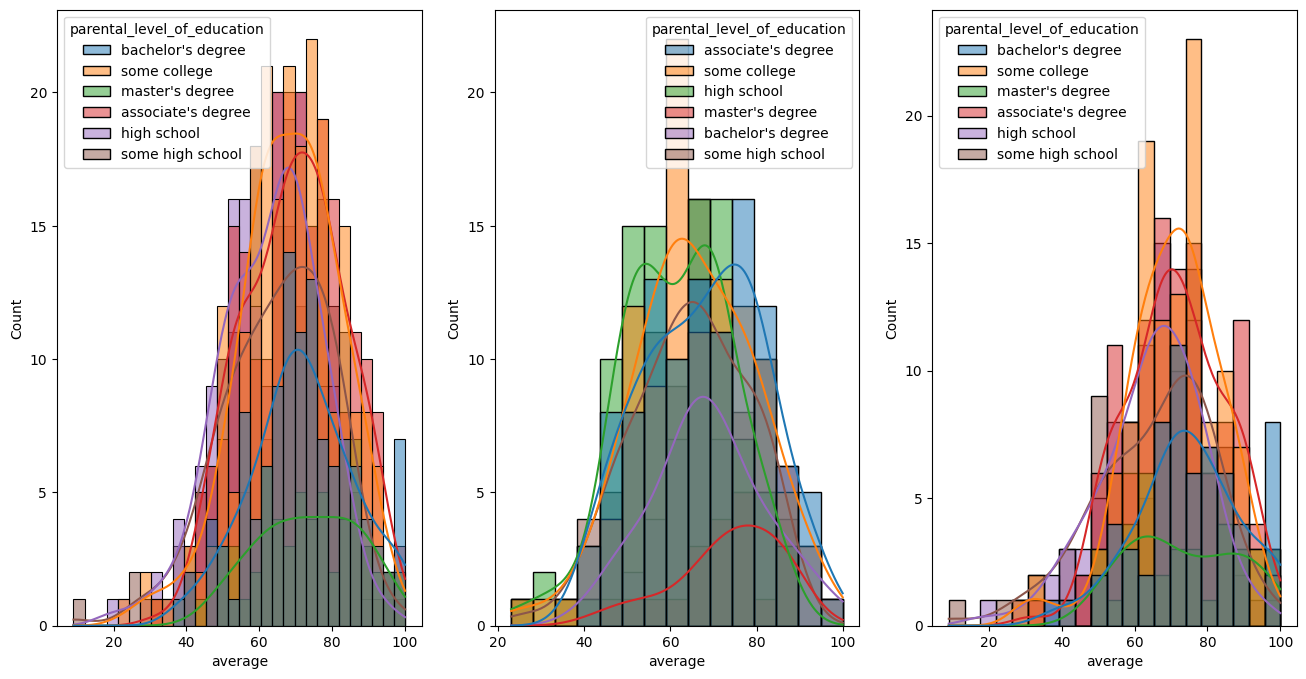

In [95]:
fig,gca = plt.subplots(1,3,figsize=(16,8))
plt.subplot(131)
sns.histplot(data=df_copy,x='average',kde=True,bins=30,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df_copy[df_copy['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df_copy[df_copy['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
- Parent education does not help student to perform well in exam.
- Students whoes parental education level is master's degree are performing poor compared to other students.
 

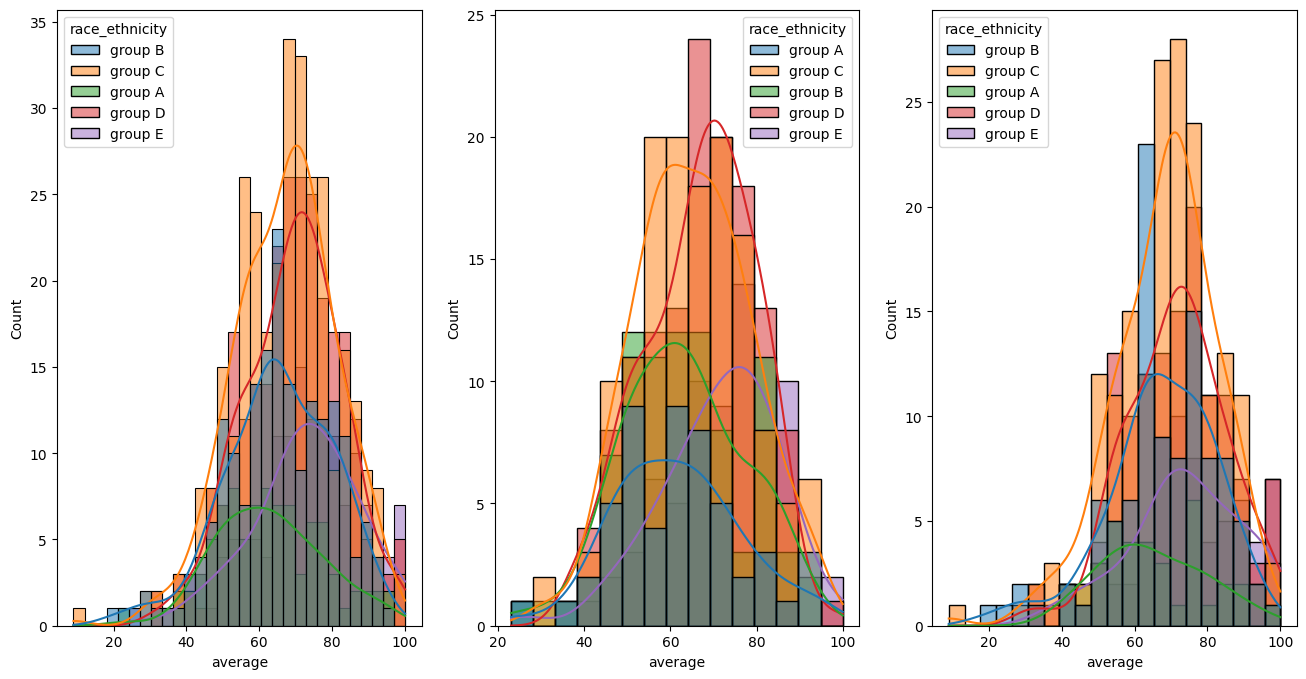

In [96]:
fig,gca = plt.subplots(1,3,figsize=(16,8))
plt.subplot(131)
sns.histplot(data=df_copy,x='average',kde=True,bins=30,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df_copy[df_copy['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df_copy[df_copy['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights
- Students having standard lunch are performing better in exam compared to the student having free/reduced lunch be it male or female. 

### Insights 
- Students from Group A are performing poor compared to the other group students be it male or female.

## 4.2 Multivariant Analysis